In [1]:
from IPython.display import Image
#from PIL import Image, ImageDraw
import PIL.Image
import numpy as np
import gym

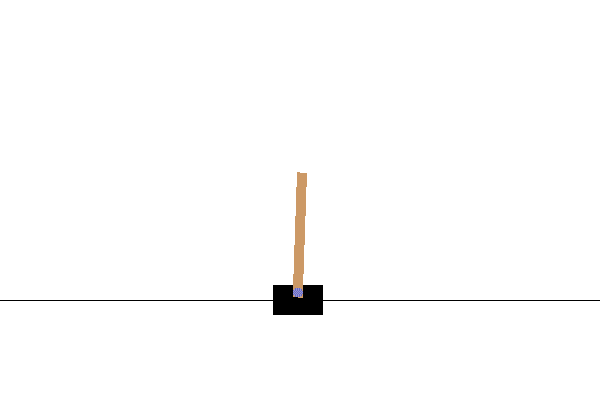

In [2]:
env = gym.make('CartPole-v0')

# Random actor
observation = env.reset()
cum_reward = 0
frames = []
for t in range(1000):
    # Render into buffer. 
    # You will still see the window.
    frames.append(PIL.Image.fromarray(env.render(mode = 'rgb_array'), "RGB"))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close()

# Save the GIF
frames[0].save('random_actor.gif', format='GIF', append_images=frames[1:], save_all=True, duration=10, loop=0)

# Display the GIF in Jupyter
Image(filename="./random_actor.gif")

In [3]:
# Create a simple first-order model
def simple_model(w, x):
    z = w[0] + w[1]*x[0] + w[2]*x[1]
    a = 1 / (1 + np.exp(-z))
    return int(round(a))

random_weight = np.random.uniform(-1, 1, 3)
random_inputs = np.random.rand(4)

simple_model(random_weight, random_inputs)

1

In [4]:
# Create a more complex second-order model
def complex_model(w, x):
    # First-order part
    z = w[0] + w[1]*x[0] + w[2]*x[1]
    
    # Interaction term
    x += w[3]*x[0]*x[1]
    
    # Second-order part
    z += w[4]*x[0]**2 + w[5]*x[1]**2
    
    a = 1 / (1 + np.exp(-z))
    return int(round(a))

random_weight = np.random.uniform(-1, 1, 6)
random_inputs = np.random.rand(4)

simple_model(random_weight, random_inputs)

0

## Trying the simple model randomly

In [5]:
env = gym.make('CartPole-v0')

best_w = None
best_score = 0
# Simple model
for m in range(25):
    w = np.random.uniform(-1, 1, 3)
    scores = []
    for i in range(100):
        observation = env.reset()
        score = 0
        frames = []
        for t in range(1000):
            action = simple_model(w, observation)
            observation, reward, done, info = env.step(action)
            if done:
                break
            score += reward
        scores.append(score)
    print(f"[{m+1:3}] Minimum {min(scores):5.1f} Maximum {max(scores):5.1f} Average {sum(scores)/len(scores):5.1f}")
    if sum(scores)/len(scores) > best_score:
        best_score = sum(scores)/len(scores)
        best_w = w
env.close()
print(best_score)
print(best_w)

[  1] Minimum  10.0 Maximum  19.0 Average  14.1
[  2] Minimum   7.0 Maximum  10.0 Average   8.4
[  3] Minimum   7.0 Maximum  10.0 Average   8.4
[  4] Minimum   7.0 Maximum  10.0 Average   8.4
[  5] Minimum   7.0 Maximum  10.0 Average   8.5
[  6] Minimum   7.0 Maximum  10.0 Average   8.2
[  7] Minimum   7.0 Maximum  10.0 Average   8.2
[  8] Minimum   9.0 Maximum  14.0 Average  11.2
[  9] Minimum   7.0 Maximum  10.0 Average   8.4
[ 10] Minimum   7.0 Maximum  10.0 Average   8.3
[ 11] Minimum   7.0 Maximum  10.0 Average   8.4
[ 12] Minimum   7.0 Maximum  10.0 Average   8.4
[ 13] Minimum  20.0 Maximum  85.0 Average  35.5
[ 14] Minimum   7.0 Maximum  10.0 Average   8.4
[ 15] Minimum   7.0 Maximum  10.0 Average   8.3
[ 16] Minimum   7.0 Maximum  10.0 Average   8.4
[ 17] Minimum   7.0 Maximum  10.0 Average   8.2
[ 18] Minimum  13.0 Maximum  35.0 Average  20.5
[ 19] Minimum   8.0 Maximum  15.0 Average  11.1
[ 20] Minimum   8.0 Maximum  15.0 Average  11.2
[ 21] Minimum  10.0 Maximum  19.0 Averag

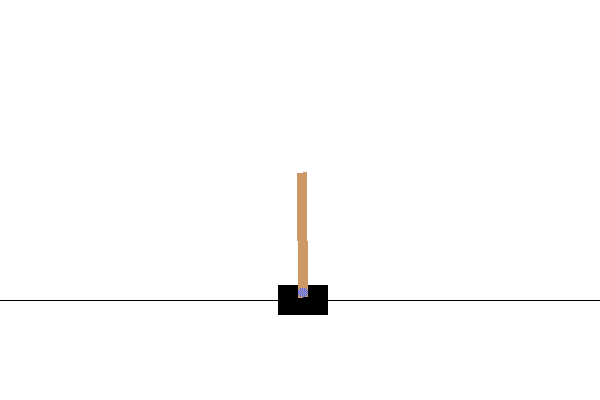

In [6]:
env = gym.make('CartPole-v0')

observation = env.reset()
cum_reward = 0
frames = []
for t in range(1000):
    frames.append(PIL.Image.fromarray(env.render(mode = 'rgb_array'), "RGB"))
    action = simple_model(best_w, observation)
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close()

# Save the GIF
frames[0].save('random_simple.gif', format='GIF', append_images=frames[1:], save_all=True, duration=10, loop=0)

# Display the GIF in Jupyter
Image(filename="./random_simple.gif")

## Trying the complex model randomly

In [7]:
env = gym.make('CartPole-v0')

best_w = None
best_score = 0
# Complex model
for m in range(25):
    w = np.random.uniform(-1, 1, 6)
    scores = []
    for i in range(100):
        observation = env.reset()
        score = 0
        frames = []
        for t in range(1000):
            action = complex_model(w, observation)
            observation, reward, done, info = env.step(action)
            if done:
                break
            score += reward
        scores.append(score)
    print(f"[{m+1:3}] Minimum {min(scores):5.1f} Maximum {max(scores):5.1f} Average {sum(scores)/len(scores):5.1f}")
    if sum(scores)/len(scores) > best_score:
        best_score = sum(scores)/len(scores)
        best_w = w
env.close()
print(best_score)
print(best_w)

[  1] Minimum   8.0 Maximum  13.0 Average  10.5
[  2] Minimum   8.0 Maximum  13.0 Average  10.2
[  3] Minimum   7.0 Maximum  10.0 Average   8.3
[  4] Minimum   7.0 Maximum  10.0 Average   8.4
[  5] Minimum   8.0 Maximum  13.0 Average   9.9
[  6] Minimum   8.0 Maximum  28.0 Average  10.9
[  7] Minimum   7.0 Maximum  10.0 Average   8.5
[  8] Minimum   7.0 Maximum  11.0 Average   9.0
[  9] Minimum   7.0 Maximum  12.0 Average   8.9
[ 10] Minimum   7.0 Maximum  11.0 Average   9.2
[ 11] Minimum   7.0 Maximum  10.0 Average   8.3
[ 12] Minimum   7.0 Maximum  10.0 Average   8.3
[ 13] Minimum   7.0 Maximum  10.0 Average   8.3
[ 14] Minimum   7.0 Maximum  10.0 Average   8.3
[ 15] Minimum   8.0 Maximum  15.0 Average  11.7
[ 16] Minimum   7.0 Maximum  10.0 Average   8.3
[ 17] Minimum   7.0 Maximum  10.0 Average   8.3
[ 18] Minimum   9.0 Maximum  17.0 Average  12.8
[ 19] Minimum  10.0 Maximum  21.0 Average  14.8
[ 20] Minimum   7.0 Maximum  10.0 Average   8.4
[ 21] Minimum  13.0 Maximum  29.0 Averag

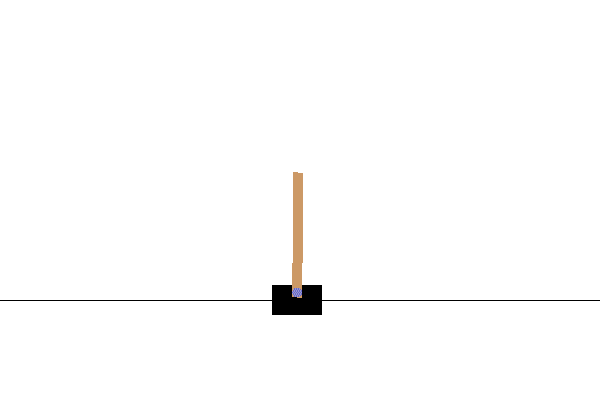

In [8]:
env = gym.make('CartPole-v0')

observation = env.reset()
cum_reward = 0
frames = []
for t in range(1000):
    frames.append(PIL.Image.fromarray(env.render(mode = 'rgb_array'), "RGB"))
    action = simple_model(best_w, observation)
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close()

# Save the GIF
frames[0].save('random_complex.gif', format='GIF', append_images=frames[1:], save_all=True, duration=10, loop=0)

# Display the GIF in Jupyter
Image(filename="./random_complex.gif")